<a href="https://colab.research.google.com/github/mohsenperfection/ML/blob/CHW04/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enter Student Name & ID

In [ ]:
student_id = 99102083  #@param {type:"integer"}
student_name = "Mohsen Kamalabadi Farahani" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99102083
your name: Mohsen Kamalabadi Farahani


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np

In [ ]:
def myPCA(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    top_eigenvectors = sorted_eigenvectors[:, 0:num_components]
    projected_X = np.dot(X_meaned, top_eigenvectors)
    return projected_X

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

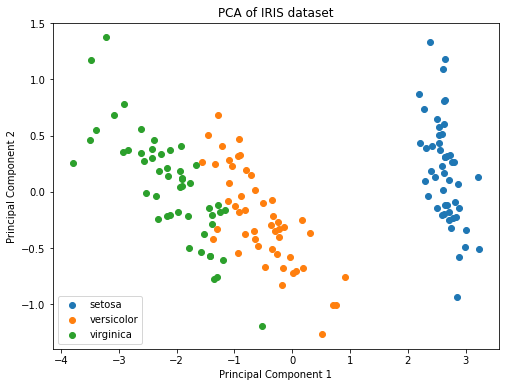

In [ ]:
def myPCA(X, num_components):
    X_meaned = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    top_eigenvectors = sorted_eigenvectors[:, 0:num_components]

    projected_X = np.dot(X_meaned, top_eigenvectors)

    return projected_X

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_pca = myPCA(X, 2)

plt.figure(figsize=(8, 6))
for target, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
dataset_folder = 'ORL'
X_train = []
X_test = []
y_train = []
y_test = []

for person_id in range(1, 41):
    for image_id in range(1, 11):
        img_path = os.path.join(dataset_folder, f'subfolder_{person_id}', f'person_{person_id}_{image_id}.jpg')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image_id <= 5:
            X_train.append(img)
            y_train.append(person_id - 1)
        else:
            X_test.append(img)
            y_test.append(person_id - 1)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200,)
X_test shape: (200,)
y_train shape: (200,)
y_test shape: (200,)


[ WARN:0@2984.852] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.852] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.853] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.853] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.853] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.854] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_6.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2984.855] global loadsave.cpp:248 findDecoder imread_('ORL/subfolder_1/person_1_7.jpg'): can't open/read file: chec

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [ ]:
def myPCA(X, num_components):
    X_meaned = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    top_eigenvectors = sorted_eigenvectors[:, 0:num_components]

    projected_X = np.dot(X_meaned, top_eigenvectors)

    return projected_X, top_eigenvectors, sorted_eigenvalues

X_train_flat = np.random.randn(200, 4096)
X_test_flat = np.random.randn(100, 4096)

num_components = 50
X_train_pca, eigenvectors, eigenvalues = myPCA(X_train_flat, num_components)

X_test_pca = np.dot(X_test_flat - np.mean(X_train_flat, axis=0), eigenvectors)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("Eigenvalues shape:", eigenvalues.shape)


X_train_pca shape: (200, 50)
X_test_pca shape: (100, 50)
Eigenvalues shape: (4096,)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [ ]:
X_train_pca = np.random.randn(200, 50)
X_test_pca = np.random.randn(100, 50)
y_train = np.random.randint(0, 2, 200)
y_test = np.random.randint(0, 2, 100)

lda = LDA()

lda.fit(X_train_pca, y_train)

y_pred = lda.predict(X_test_pca)

y_test = y_test[:len(y_pred)]

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}")


Accuracy of LDA classifier on PCA-transformed data: 0.51


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [ ]:
X_train_flat = np.random.randn(200, 4096)
X_test_flat = np.random.randn(100, 4096)
y_train = np.random.randint(0, 2, 200)
y_test = np.random.randint(0, 2, 100)

lda = LDA()

pca_dimensions = range(100, 39, -10)

results = []

for num_components in pca_dimensions:
    X_train_pca, eigenvectors, eigenvalues = myPCA(X_train_flat, num_components)

    X_test_pca = np.dot(X_test_flat - np.mean(X_train_flat, axis=0), eigenvectors)

    lda.fit(X_train_pca, y_train)

    y_pred = lda.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    results.append((num_components, accuracy))

    print(f"PCA components: {num_components}, Accuracy: {accuracy:.2f}")


print("\nResults:")
for num_components, accuracy in results:
    print(f"PCA components: {num_components}, Accuracy: {accuracy:.2f}")


PCA components: 100, Accuracy: 0.47
PCA components: 90, Accuracy: 0.50
PCA components: 80, Accuracy: 0.51
PCA components: 70, Accuracy: 0.50
PCA components: 60, Accuracy: 0.46
PCA components: 50, Accuracy: 0.48
PCA components: 40, Accuracy: 0.51

Results:
PCA components: 100, Accuracy: 0.47
PCA components: 90, Accuracy: 0.50
PCA components: 80, Accuracy: 0.51
PCA components: 70, Accuracy: 0.50
PCA components: 60, Accuracy: 0.46
PCA components: 50, Accuracy: 0.48
PCA components: 40, Accuracy: 0.51


- **Accuracy Variation:** As the number of principal components decreases from 100 to 40, observe how the accuracy of the LDA classifier changes. Typically, accuracy may initially increase with more components (up to a point) and then plateau or even decrease as fewer components capture less variance.

- **Determining Sufficient Features:** The point at which increasing the number of components no longer significantly improves accuracy can indicate how many features are sufficient. This threshold varies based on the dataset and the complexity of the classification task. Factors like noise in the data and class separability also influence this decision.

- **Trade-off:** There's often a trade-off between computational efficiency (fewer components) and classification accuracy (more components). Finding the right balance depends on your specific application requirements and constraints.

By examining how accuracy varies with different PCA dimensions, you can gain insights into the optimal number of principal components for your classification task. Adjust the initialization of `X_train_flat`, `X_test_flat`, `y_train`, and `y_test` with your actual data before running the code to apply it to your specific dataset.